In [14]:
import json, os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [15]:
# READ GENE_INFO JSON FILE
gene_info_path = "../data/gene_info.json"
dataset_path   = "../data/one_vs_other/"
with open(gene_info_path, 'r') as json_file:
    gene_info = json.load(json_file)

In [16]:
testset_dir = "../data/testset/"
csv_files = [f for f in os.listdir(testset_dir) if f.endswith('.csv')]

dataframes = []
for csv_file in csv_files:
    csv_path = os.path.join(testset_dir, csv_file)
    df = pd.read_csv(csv_path)
    dataframes.append(df)

full_testset = pd.concat(dataframes, ignore_index=True)
full_testset = full_testset[['id', 'sequence', 'length', 'class']]

In [4]:
full_testset.to_csv("../data/testset-full/testset.csv", index=False)

In [17]:
full_testset

,id,sequence,length,class
0,Thhalv10001938m -- EIL,MMMFNEMGMYGKMDFFSSTSLGEIDVCPLPQAEQDHPVVEEDYTDD...,582,EIL
1,Tp1g37880 -- EIL,MGVFFSDPDSIAEDDGYTDNELDVDELEKRIWKQEMRLRRLKEHRK...,211,EIL
2,Pbr004574.1 -- EIL,MGDVGEIGPDISSDIEEDLRCDNIAEKDVSDEEIEAEDLERRMWKD...,608,EIL
3,Sme2.5_02278.1_g00005.1 -- EIL,MNNEVVEENQEFDDEEINYDDLKRRMWKDRMRMQILKGKKRDMMIE...,494,EIL
4,ONIVA11G15950.1 -- EIL,MDASKKSVMTKEEQQLSPAASPAAAVMTAEADAINEEQDKAAAATT...,466,EIL
...,...,...,...,...
64086,SapurV1A.1588s0020.3.p -- NF-YA,MALRIQNLLKKNFDEPHLTVSCPSWWNSNEQHFSPSLSKNISFKAD...,338,NF-YA
64087,Sevir.3G413100.9.p -- NF-YA,MTSVVHSVSGDHRAEDQHQQQKQAEPEDQQEAPVTSSDSQPTVGTP...,214,NF-YA
64088,XP_015875900.1 -- NF-YA,MQSKSQSTSRPGPDPHTITPANVYTEPWWRTSGYNPIPPPLAGGNA...,348,NF-YA
64089,RrC2575_p4 -- NF-YA,MMGLVTSRVPLPHNYQENEPMFVNAKQYHAILRRRKHRAKLEAQNK...,129,NF-YA


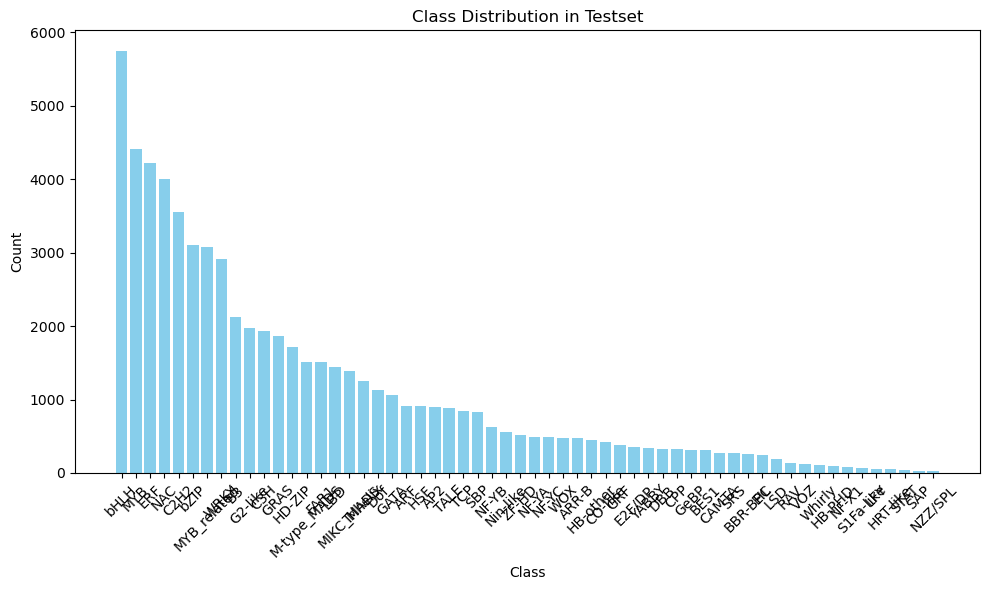

In [18]:
class_counts = full_testset['class'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(class_counts.index, class_counts.values, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution in Testset')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
class_mapping = {label: i + 1 for i, label in enumerate(full_testset['class'].unique())}
full_testset['true_label'] = full_testset['class'].map(class_mapping)
true_labels_series = full_testset['true_label']
true_labels_series.to_csv('../data/testset-full/true_labels.csv', index=False, header=True)

with open('../data/testset-full/class_mapping.json', 'w') as json_file:
    json.dump(class_mapping, json_file, indent=4)

In [20]:
class_mapping

{'EIL': 1,
 'S1Fa-like': 2,
 'Whirly': 3,
 'ERF': 4,
 'TALE': 5,
 'SBP': 6,
 'HB-PHD': 7,
 'GRF': 8,
 'LBD': 9,
 'C3H': 10,
 'STAT': 11,
 'GRAS': 12,
 'Nin-like': 13,
 'GeBP': 14,
 'FAR1': 15,
 'ARF': 16,
 'B3': 17,
 'NZZ/SPL': 18,
 'TCP': 19,
 'HB-other': 20,
 'BBR-BPC': 21,
 'MYB_related': 22,
 'BES1': 23,
 'HD-ZIP': 24,
 'bHLH': 25,
 'CO-like': 26,
 'G2-like': 27,
 'LFY': 28,
 'ZF-HD': 29,
 'M-type_MADS': 30,
 'bZIP': 31,
 'MYB': 32,
 'Trihelix': 33,
 'RAV': 34,
 'HSF': 35,
 'VOZ': 36,
 'E2F/DP': 37,
 'LSD': 38,
 'SRS': 39,
 'ARR-B': 40,
 'DBB': 41,
 'C2H2': 42,
 'HRT-like': 43,
 'WOX': 44,
 'GATA': 45,
 'Dof': 46,
 'WRKY': 47,
 'YABBY': 48,
 'NAC': 49,
 'NF-X1': 50,
 'CPP': 51,
 'NF-YC': 52,
 'AP2': 53,
 'NF-YB': 54,
 'MIKC_MADS': 55,
 'CAMTA': 56,
 'SAP': 57,
 'NF-YA': 58}